In [2]:
import scanpy as sc
import omicverse as ov
import scvelo as scv

ov.ov_plot_set()



   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.4, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


In [5]:
ad = sc.read('/data/qin2/Yuqing/cellfate/HGC/s1_HGC.h5ad')
ad

AnnData object with n_obs × n_vars = 10993 × 28519
    obs: 'n_genes', 'sample', 'location', 'enrichment', 'cryopreserved', 'TP', 'dig_protocol', 'percent_mito', 'n_counts', 'low_ncounts', 'high_mito', 'low_ncounts_high_mito', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'PCW', 'sample_source', 'trimester', 'celltype', 'lineage', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'pt_via', 'leiden', 'mellon_log_density_lowd'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_bioty

In [6]:
ad.X.max()

7.197321

<AxesSubplot: xlabel='X_umap1', ylabel='X_umap2'>

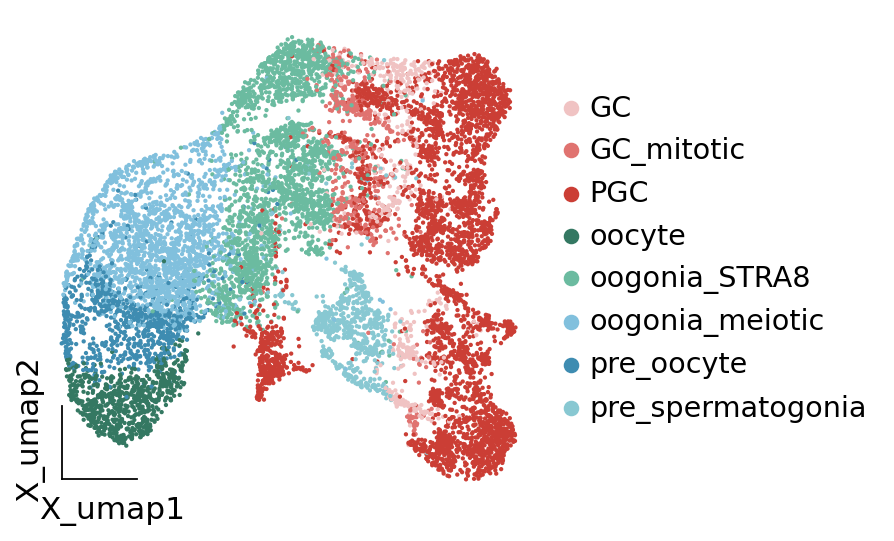

In [7]:
ov.pl.embedding(ad,
                basis="X_umap",
                color=['celltype'],title='',size=15,
                show=False, #legend_loc=None, add_outline=False, 
                frameon='small',legend_fontoutline=2,#ax=ax
)

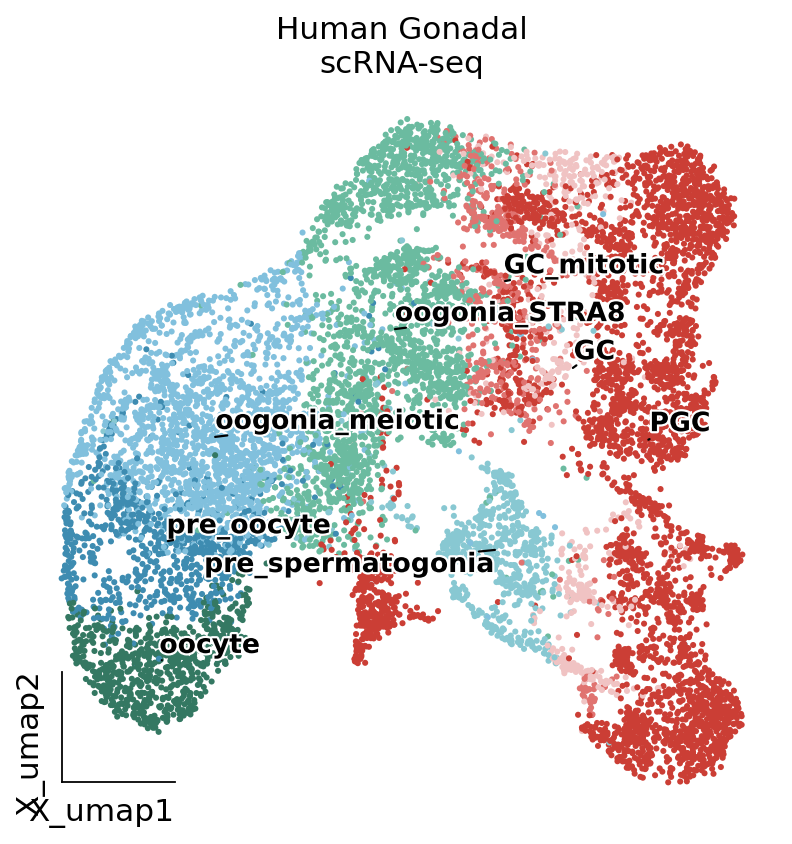

In [69]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(6,6))
ov.pl.embedding(
    ad,
    basis="X_umap",
    color=['celltype'],title='',
    show=False,  
    frameon='small',
    size=30,
    palette=ov.pl.red_color[:3]+ov.pl.blue_color[:],
    ax=ax,
    legend_loc=None, add_outline=False, 
)

ov.pl.embedding_adjust(
    ad,
    basis="X_umap",
    groupby='celltype',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)


plt.title('Human Gonadal\nscRNA-seq', fontsize=14)
plt.savefig(f'HGC/Human Gonadal.png',dpi=300,bbox_inches='tight')
plt.savefig(f'HGC/Human Gonadal.pdf',dpi=300,bbox_inches='tight')



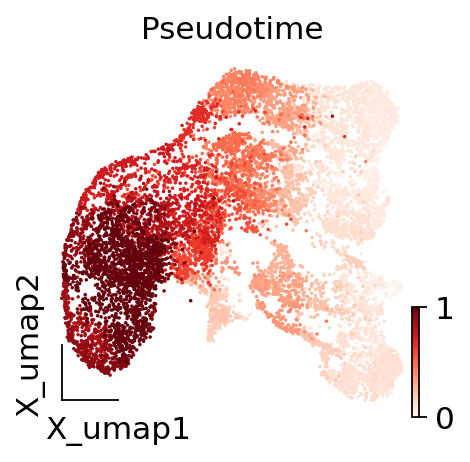

In [71]:
fig, ax = plt.subplots(figsize=(3,3))
ov.pl.embedding(
    ad,
    basis="X_umap",
    color=["pt_via"],title='',
    show=False,  
    frameon='small',
    size=10,
    cmap='Reds',
    #palette=ov.pl.red_color[:7]+ov.pl.green_color[:6]+ov.pl.blue_color[:],
    ax=ax,
    legend_loc=None, add_outline=False, 
)
ax.set_title('Pseudotime', fontsize=14)
plt.savefig(f'HGC/umap-pt-final.png',dpi=300,bbox_inches='tight')
plt.savefig(f'HGC/umap-pt-final.pdf',dpi=300,bbox_inches='tight')



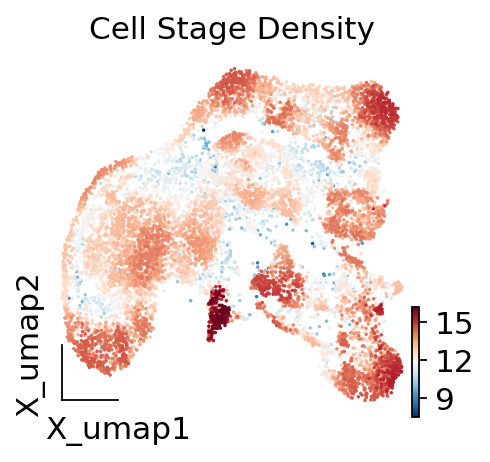

In [67]:
fig, ax = plt.subplots(figsize=(3,3))
ov.pl.embedding(
    ad,
    basis="X_umap",
    color=['mellon_log_density_lowd'],title='Cell Stage Density',
    show=False,  
    frameon='small',
    size=10,
    cmap='RdBu_r',
    #palette=ov.pl.red_color[:7]+ov.pl.green_color[:6]+ov.pl.blue_color[:],
    ax=ax,
    legend_loc=None, add_outline=False, 
)
ax.set_title('Cell Stage Density', fontsize=14)
plt.savefig(f'HGC/umap-mellon-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'HGC/umap-mellon-33.pdf',dpi=300,bbox_inches='tight')



  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00


 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


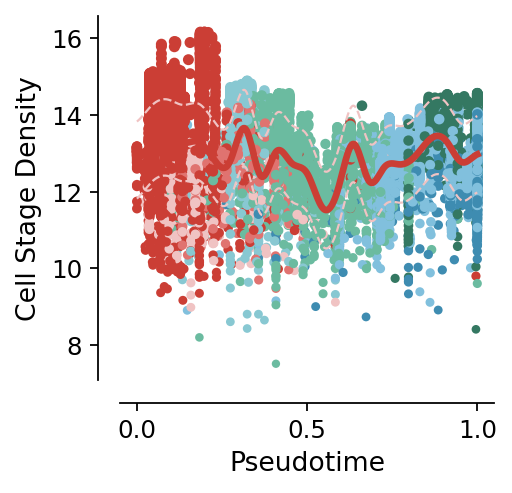

In [68]:
fig, ax = plt.subplots(figsize=(3,3))
#x=ad[ad.obs['leiden'].isin(visual_cluster),gene].to_df().values.reshape(-1)
x=ad.obs['pt_via'].values.reshape(-1)
y=ad.obs['mellon_log_density_lowd'].values.reshape(-1)

color_dict=dict(zip(ad.obs['celltype'].cat.categories,
                   ad.uns['celltype_colors']))

from pygam import LinearGAM

gam = LinearGAM(n_splines=25).gridsearch(x.reshape(x.shape[0],1), y)
XX = gam.generate_X_grid(term=0, n=500)

plt.plot(XX, gam.predict(XX), '-',linewidth=3,
        color=ov.pl.red_color[2])
plt.plot(XX, gam.prediction_intervals(XX, width=.65), 
         color=ov.pl.red_color[0], ls='--',linewidth=1,)

ax.scatter(x,y,c=[color_dict[i] for i in ad.obs['celltype'].tolist()],
           cmap='RdBu_r',s=y)

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)


# 设置标签和标题
ax.set_xlabel('')
ax.set_ylabel('$R^2$', fontsize=13)
ax.set_title('', fontsize=13)
#ax.set_xticks(x + width)
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=11,rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

plt.xlabel('Pseudotime',fontsize=12)
plt.ylabel('Cell Stage Density',fontsize=12)
plt.title('',fontsize=12)

plt.savefig(f'HGC/density-pt-leiden-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'HGC/density-pt-33.pdf',dpi=300,bbox_inches='tight')



In [13]:
cfg_obj3=ov.single.Fate(ad,pseudotime='pt_via')
cfg_obj3.model_init()
cfg_obj3.ATR(stop=500)

$MSE|RMSE|MAE|R^2$:0.015|0.12|0.092|0.87
coef_threshold:0.006033915560692549, r2:0.864426832898353


coef_threshold        r2
0          0.009556  0.492691
1          0.009227  0.622410
2          0.009176  0.622452
3          0.008886  0.622466
4          0.008876  0.624590
..              ...       ...
495        0.004754  0.904107
496        0.004753  0.904103
497        0.004753  0.904090
498        0.004747  0.904076
499        0.004746  0.904087

[500 rows x 2 columns]

Text(0.5, 1.0, 'HGC\nOmicFate')

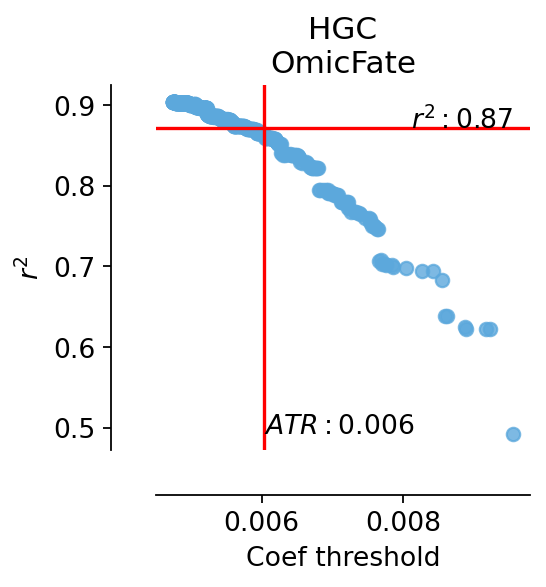

In [72]:
fig,ax=cfg_obj3.plot_filtering(color='#5ca8dc')
ax.set_title('HGC\nOmicFate')

In [15]:
res=cfg_obj3.model_fit()

$MSE|RMSE|MAE|R^2$:0.016|0.13|0.095|0.86


(<Figure size 240x240 with 1 Axes>,
 <AxesSubplot: title={'center': 'Dimension: 28519'}, xlabel='Raw', ylabel='Predicted'>)

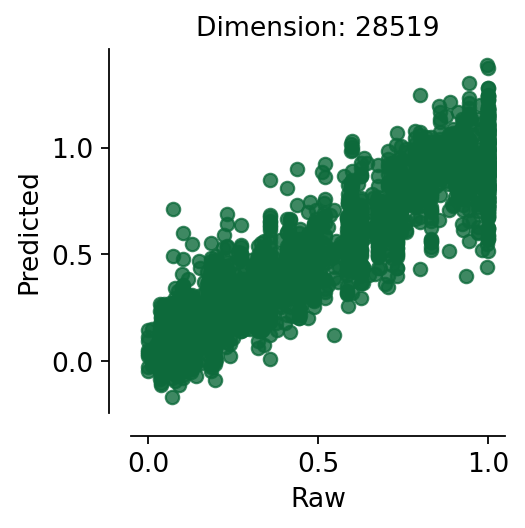

In [16]:
cfg_obj3.plot_fitting(type='raw')

Text(1.1, 0.5, 'rmse')

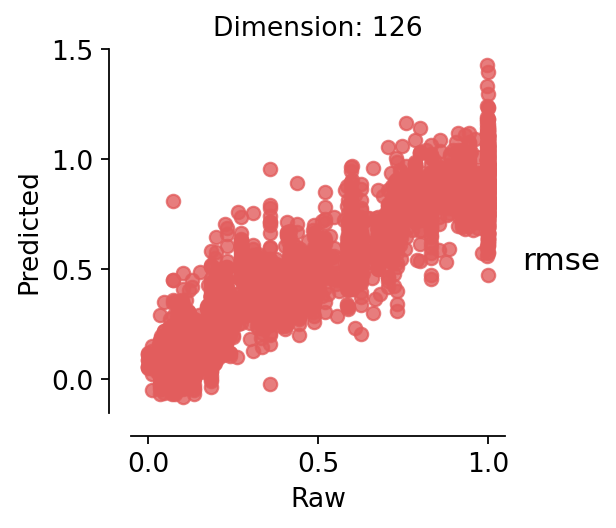

In [17]:
fig,ax=cfg_obj3.plot_fitting(type='filter',color='#e25d5d')
ax.text(1.1,0.5,'rmse')

In [18]:
var_name=cfg_obj3.filter_coef.index.tolist()

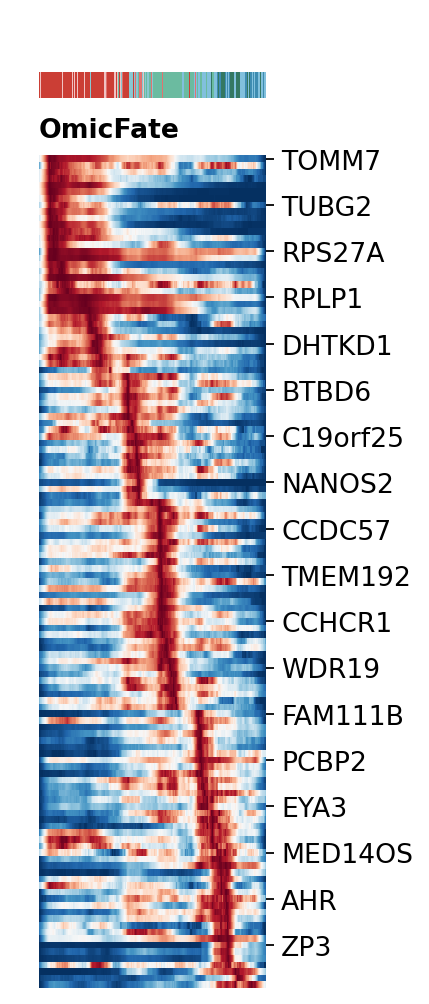

In [66]:
g=ov.utils.plot_heatmap(ad,var_names=var_name,
                  sortby='pt_via',col_color='celltype',
                 n_convolve=3000,figsize=(1,6),show=False,)

g.fig.set_size_inches(2, 8)
g.fig.suptitle('OmicFate',x=0.25,y=0.83,
               horizontalalignment='left',fontsize=12,fontweight='bold')
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=12)

plt.savefig(f'/data/qin2/Yuqing/cellfate/HGC/heatmap_omicfate.png',dpi=300,bbox_inches='tight')
plt.savefig(f'/data/qin2/Yuqing/cellfate/HGC/heatmap_omicfate.pdf',dpi=300,bbox_inches='tight')



In [27]:
ov.pp.leiden(ad,resolution=2)

running Leiden clustering
    finished: found 33 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:05)


<AxesSubplot: xlabel='X_umap1', ylabel='X_umap2'>

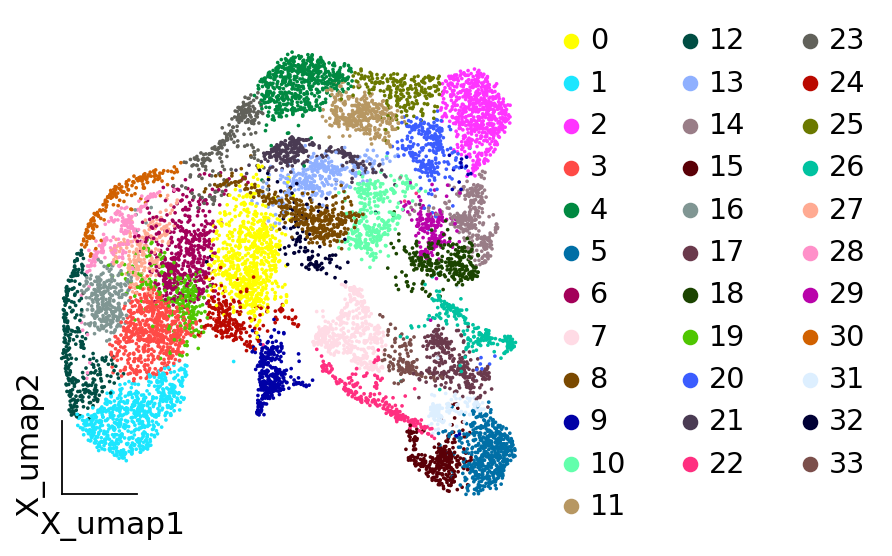

In [12]:
ov.pl.embedding(ad,
    basis="X_umap",
                  color=['leiden'],title='',#size=15,
                   show=False, #legend_loc=None, add_outline=False, 
                   frameon='small',legend_fontoutline=2,#ax=ax
                 )

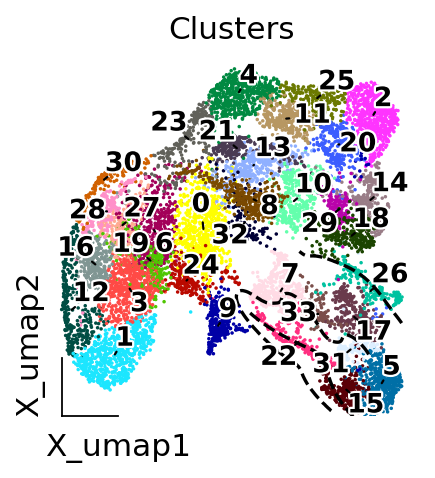

In [65]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(3,3))
ov.pl.embedding(
    ad,
    basis="X_umap",
    color=['leiden'],title='',
    show=False,  
    frameon='small',
    size=10,
    #palette=ov.pl.red_color[:7]+ov.pl.green_color[:6]+ov.pl.blue_color[:],
    ax=ax,
    legend_loc=None, add_outline=False, 
)

ov.pl.embedding_adjust(
    ad,
    basis="X_umap",
    groupby='leiden',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)

ov.pl.contour(ax=ax,adata=ad,
        basis="X_umap",
        groupby='leiden',clusters=['15','22'],
        contour_threshold=0.02,colors='#000000',linestyles='dashed')

ov.pl.contour(ax=ax,adata=ad,
        basis="X_umap",
        groupby='leiden',clusters=[
           '5','17','7'],
        contour_threshold=0.01,colors='#000000',linestyles='dashed')

plt.title('Clusters', fontsize=14)
plt.savefig(f'HGC/umap-leiden.png',dpi=300,bbox_inches='tight')
plt.savefig(f'HGC/umap-leiden.pdf',dpi=300,bbox_inches='tight')



In [32]:
cfg_obj3.low_density(pca_key='X_pca')

computing neighbors


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


[2024-07-29 18:39:58,154] [INFO    ] Computing nearest neighbor distances.
[2024-07-29 18:39:58,288] [WARNING ] Using EXPERIMENTAL fractal dimensionality selection.
[2024-07-29 18:39:59,950] [INFO    ] Using d=1.9897807584452247.
[2024-07-29 18:40:00,209] [INFO    ] Using covariance function Matern52(ls=0.013619990496792833).
[2024-07-29 18:40:00,213] [INFO    ] Computing 5,000 landmarks with k-means clustering.
[2024-07-29 18:40:05,691] [INFO    ] Doing low-rank Cholesky decomposition for 10,993 samples and 5,000 landmarks.
[2024-07-29 18:40:12,555] [INFO    ] Using rank 5,000 covariance representation.
[2024-07-29 18:40:14,161] [INFO    ] Running inference using L-BFGS-B.


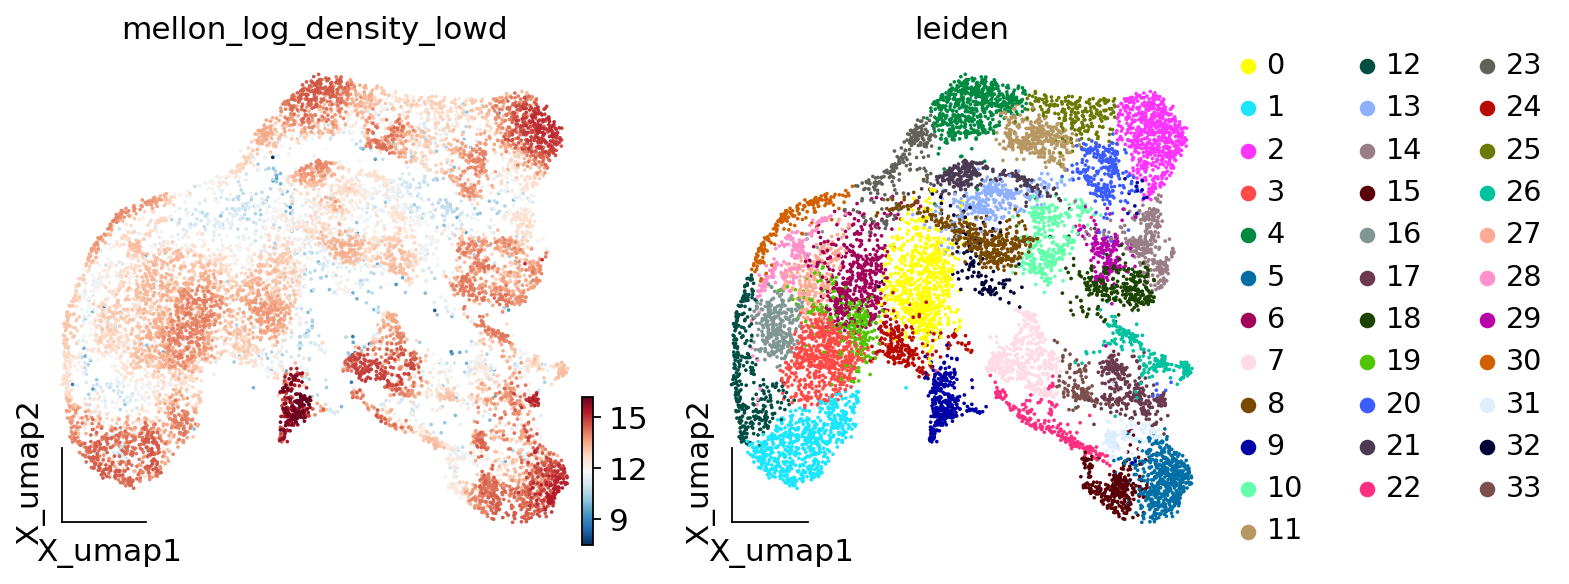

In [21]:
ov.pl.embedding(ad,
                basis='X_umap',
                color=['mellon_log_density_lowd','leiden'],
                frameon='small',
               cmap='RdBu_r')

In [20]:
ad

AnnData object with n_obs × n_vars = 10993 × 28519
    obs: 'n_genes', 'sample', 'location', 'enrichment', 'cryopreserved', 'TP', 'dig_protocol', 'percent_mito', 'n_counts', 'low_ncounts', 'high_mito', 'low_ncounts_high_mito', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'PCW', 'sample_source', 'trimester', 'celltype', 'lineage', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'pt_via', 'leiden', 'mellon_log_density_lowd'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_bioty

## Early Germ Cells

In [22]:
ad.layers['counts'] = ad.X.copy()

In [23]:
cfg_obj3.lineage_score(cluster_key='leiden',lineage=['5','15','22', '31','33','7','17'],
                      expression_key='counts')

Run low_density first


100%|██████████| 10993/10993 [00:39<00:00, 280.38it/s]


Calculating lineage score
The lineage score stored in adata.var['change_scores_lineage']


In [42]:
cfg_obj3.lineage_score(cluster_key='leiden',lineage=['31','17','33'],
                      expression_key='counts')

Calculating lineage score
The lineage score stored in adata.var['change_scores_lineage']


In [35]:
ad

AnnData object with n_obs × n_vars = 10993 × 28519
    obs: 'n_genes', 'sample', 'location', 'enrichment', 'cryopreserved', 'TP', 'dig_protocol', 'percent_mito', 'n_counts', 'low_ncounts', 'high_mito', 'low_ncounts_high_mito', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'PCW', 'sample_source', 'trimester', 'celltype', 'lineage', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'pt_via', 'leiden', 'mellon_log_density_lowd', 'visual'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'fea

In [43]:
scores = ad.var["change_scores_lineage"]
scores.sort_values(ascending=False)

GAGE2A             1.359100e-08
HSPA1A             1.287952e-08
DNAJB1             1.105190e-08
CYTB               9.962403e-09
MALAT1             9.755359e-09
                       ...     
ENSG00000275636    0.000000e+00
LINC01958          0.000000e+00
LINC01960          0.000000e+00
ENSG00000272800    0.000000e+00
ASB15              0.000000e+00
Name: change_scores_lineage, Length: 28519, dtype: float64

In [44]:
od_genes=scores.loc[cfg_obj3.filter_coef.index].sort_values(ascending=False)[:20]
od_genes

APOE       5.448422e-09
NANOS3     4.980181e-09
POU5F1     4.501388e-09
PCBP2      3.790406e-09
PDCD5      3.351391e-09
S100A10    3.269646e-09
STOM       3.243457e-09
PTPRA      3.178765e-09
S100A13    3.126766e-09
SRSF4      2.866140e-09
SARNP      2.845240e-09
PRDX1      2.838032e-09
TOMM7      2.568372e-09
PLK1       2.470805e-09
JMY        2.353904e-09
VMP1       2.289775e-09
RAI14      2.188196e-09
GXYLT1     2.168209e-09
MTFMT      2.154635e-09
CEP20      2.151489e-09
Name: change_scores_lineage, dtype: float64

In [45]:
del ad.raw

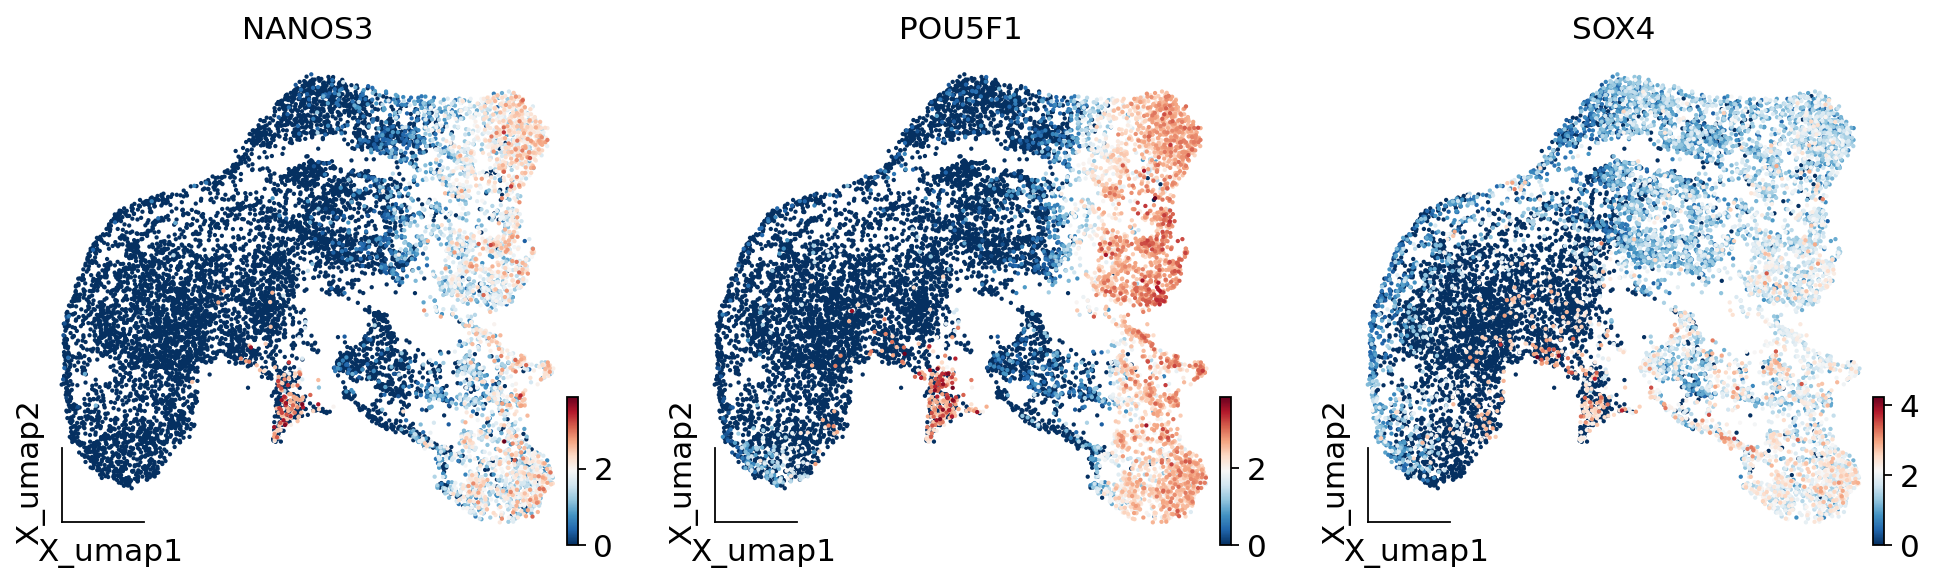

In [29]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
#fig, ax = plt.subplots(figsize=(3,3))

ov.pl.embedding(ad,
                basis='X_umap',
                color=['NANOS3','POU5F1','SOX4'],
                frameon='small',
                size=15,
               cmap='RdBu_r',)

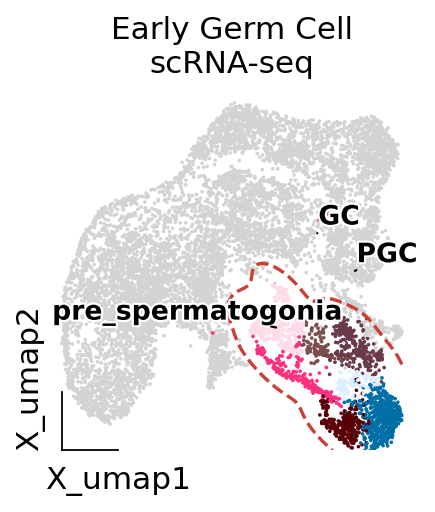

In [64]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(3,3))

visual_cluster=['5','15','22', '31','33','7','17']
ad.obs['visual']=ad.obs['leiden'].copy()
ad.obs.loc[~ad.obs['leiden'].isin(visual_cluster),'visual']=None
ov.utils.embedding(ad,
                basis='X_umap',frameon='small',
                color=['visual'],
                legend_loc=None,
                #palette=ov.utils.blue_color+ov.utils.orange_color+ov.utils.red_color+ov.utils.green_color,
                show=False,
                  ax=ax)

ov.pl.embedding_adjust(
    ad,
    basis="X_umap",
    groupby='celltype',
    exclude=tuple(set(ad.obs['celltype'].cat.categories)-set(['PGC','GC', 'pre_spermatogonia'])),  
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)

ov.pl.contour(ax=ax,adata=ad,
        basis="X_umap",
        groupby='leiden',clusters=visual_cluster,
        contour_threshold=0.02,colors=ov.pl.red_color[2],linestyles='dashed')

plt.title('Early Germ Cell\nscRNA-seq', fontsize=14)
plt.savefig(f'HGC/umap-lineage-pres.png',dpi=300,bbox_inches='tight')
plt.savefig(f'HGC/umap-lineage-pres.pdf',dpi=300,bbox_inches='tight')


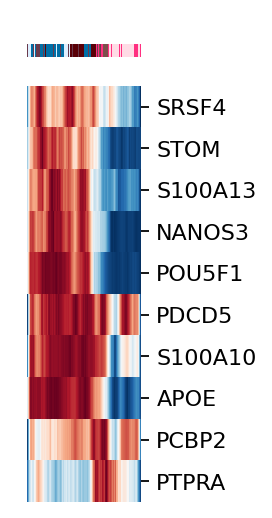

In [61]:
import matplotlib.pyplot as plt
g=ov.utils.plot_heatmap(ad[ad.obs['leiden'].isin(visual_cluster)],
                        var_names=scores.loc[cfg_obj3.filter_coef.index].sort_values(ascending=False)[:10].index.tolist(),
                  sortby='pt_via',col_color='leiden',yticklabels=True,
                 n_convolve=100,figsize=(1,6),show=False)

g.fig.set_size_inches(1, 4)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=10)

plt.savefig(f'HGC/heatmap-lineage-pres-leiden-24.png',dpi=300,bbox_inches='tight')
plt.savefig(f'HGC/heatmap-lineage-pres-leiden-24.pdf',dpi=300,bbox_inches='tight')

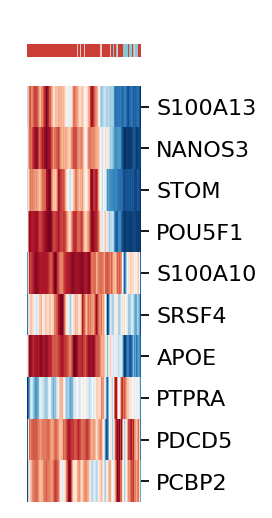

In [62]:
import matplotlib.pyplot as plt
g=ov.utils.plot_heatmap(ad[ad.obs['celltype'].isin(['PGC','GC', 'pre_spermatogonia'])],
                        var_names=scores.loc[cfg_obj3.filter_coef.index].sort_values(ascending=False)[:10].index.tolist(),
                  sortby='pt_via',col_color='celltype',yticklabels=True,
                 n_convolve=150,figsize=(1,6),show=False)

g.fig.set_size_inches(1, 4)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=10)

plt.savefig(f'HGC/heatmap-lineage-pres-ct-24.png',dpi=300,bbox_inches='tight')
plt.savefig(f'HGC/heatmap-lineage-pres-ct-24.pdf',dpi=300,bbox_inches='tight')

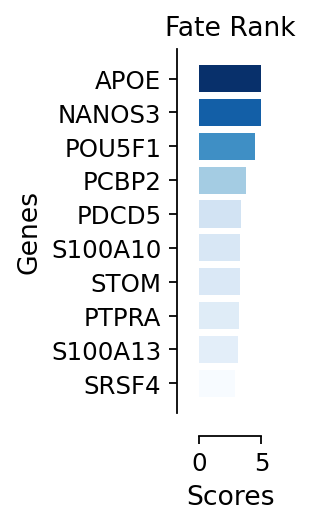

In [63]:
# 创建横向柱状图
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(0.5, 3))

od_genes=scores.loc[cfg_obj3.filter_coef.index].sort_values(ascending=False)[:10]

norm = plt.Normalize(min(od_genes.values), max(od_genes.values))
colors = cm.Blues(norm(od_genes.values))

plt.barh(od_genes.index, od_genes.values, color=colors)

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

# 设置标签和标题
ax.set_xlabel('')
ax.set_ylabel('$R^2$', fontsize=13)
ax.set_title('', fontsize=13)
ax.set_xlim(0,5e-09)
#ax.set_xticks(x + width)
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=11,rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

plt.xlabel('Scores',fontsize=12)
plt.ylabel('Genes',fontsize=12)
plt.title('Fate Rank',fontsize=12)
plt.gca().invert_yaxis()  # 反转y轴使得最高分数在顶部

plt.savefig(f'HGC/fr-lineage-pres-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'HGC/fr-lineage-pres-33.pdf',dpi=300,bbox_inches='tight')


In [56]:
import seaborn as sns

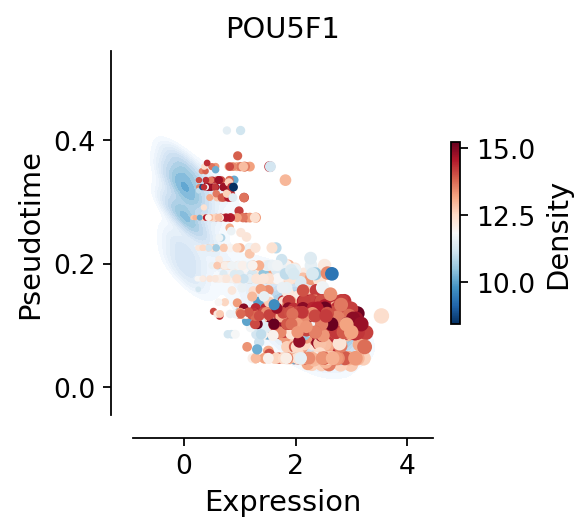

In [57]:
fig, ax = plt.subplots(figsize=(3,3))

gene='POU5F1'
visual_cluster=['5','15','22', '31','33','7','17']

x=ad[ad.obs['leiden'].isin(visual_cluster),gene].to_df().values.reshape(-1)
y=ad.obs.loc[ad.obs['leiden'].isin(visual_cluster),'pt_via'].values.reshape(-1)
z=ad.obs.loc[ad.obs['leiden'].isin(visual_cluster),'mellon_log_density_lowd'].values.reshape(-1)

sns.kdeplot(
        x=x, y=y,
        fill=True,
        cmap='Blues',
        #clip=(-5, 5), cut=10,
        thresh=0.1, levels=15,
        ax=ax,#cbar=True,
    )
scatter=ax.scatter(x,y,
           c=z, s=x*10,
           cmap='RdBu_r',
          )

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

plt.xlabel('Expression',fontsize=13)
plt.ylabel('Pseudotime',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title(gene,fontsize=13)
cbar = plt.colorbar(scatter, ax=ax,shrink=0.5)
cbar.set_label('Density', fontsize=13)
cbar.ax.tick_params(labelsize=12)

plt.savefig(f'HGC/density-lineage-pres-{gene}.png',dpi=300,bbox_inches='tight')
plt.savefig(f'HGC/density-lineage-pres-{gene}.pdf',dpi=300,bbox_inches='tight')

#cbar.set_ticklabels(cbar.get_ticklabels(),fontsize=12)

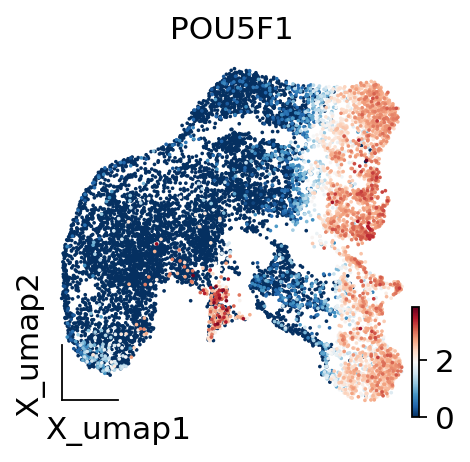

In [58]:
fig, ax = plt.subplots(figsize=(3,3))

#visual_cluster=['15','12']
#ad.obs['visual']=ad.obs['leiden'].copy()
#ad.obs.loc[~ad.obs['leiden'].isin(visual_cluster),'visual']=None
ov.utils.embedding(ad,
                basis='X_umap',frameon='small',
                color=[gene],
                legend_loc=None,
                #palette=ov.utils.blue_color+ov.utils.orange_color+ov.utils.red_color+ov.utils.green_color,
                show=False,
                ax=ax)
plt.savefig(f'/data/qin2/Yuqing/cellfate/HGC/umap-lineage-B-{gene}.png',dpi=300,bbox_inches='tight')
plt.savefig(f'/data/qin2/Yuqing/cellfate/HGC/umap-lineage-B-{gene}.pdf',dpi=300,bbox_inches='tight')


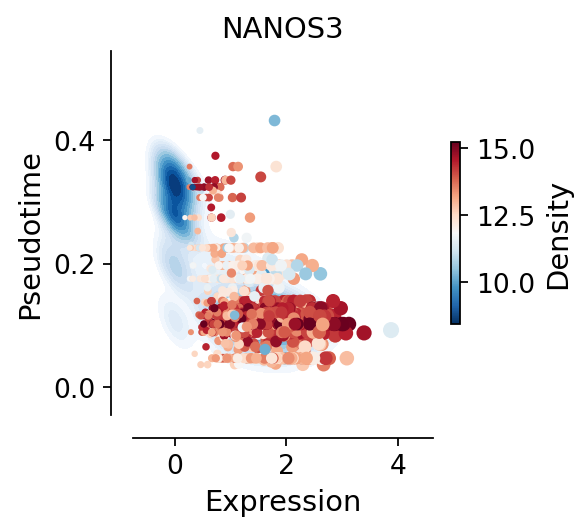

In [59]:
fig, ax = plt.subplots(figsize=(3,3))

gene='NANOS3'
visual_cluster=['5','15','22', '31','33','7','17']

x=ad[ad.obs['leiden'].isin(visual_cluster),gene].to_df().values.reshape(-1)
y=ad.obs.loc[ad.obs['leiden'].isin(visual_cluster),'pt_via'].values.reshape(-1)
z=ad.obs.loc[ad.obs['leiden'].isin(visual_cluster),'mellon_log_density_lowd'].values.reshape(-1)

sns.kdeplot(
        x=x, y=y,
        fill=True,
        cmap='Blues',
        #clip=(-5, 5), cut=10,
        thresh=0.1, levels=15,
        ax=ax,#cbar=True,
    )
scatter=ax.scatter(x,y,
           c=z, s=x*10,
           cmap='RdBu_r',
          )

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

plt.xlabel('Expression',fontsize=13)
plt.ylabel('Pseudotime',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title(gene,fontsize=13)
cbar = plt.colorbar(scatter, ax=ax,shrink=0.5)
cbar.set_label('Density', fontsize=13)
cbar.ax.tick_params(labelsize=12)

plt.savefig(f'HGC/density-lineage-pres-{gene}.png',dpi=300,bbox_inches='tight')
plt.savefig(f'HGC/density-lineage-pres-{gene}.pdf',dpi=300,bbox_inches='tight')

#cbar.set_ticklabels(cbar.get_ticklabels(),fontsize=12)

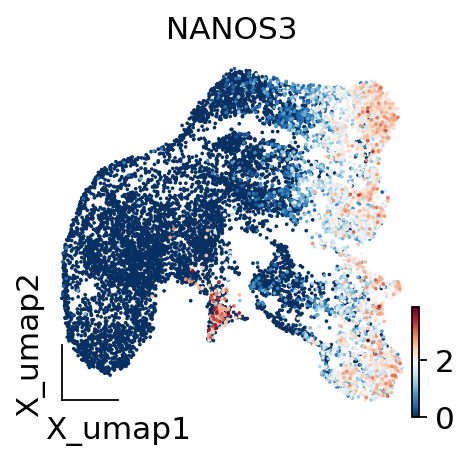

In [60]:
fig, ax = plt.subplots(figsize=(3,3))

#visual_cluster=['15','12']
#ad.obs['visual']=ad.obs['leiden'].copy()
#ad.obs.loc[~ad.obs['leiden'].isin(visual_cluster),'visual']=None
ov.utils.embedding(ad,
                basis='X_umap',frameon='small',
                color=[gene],
                legend_loc=None,
                #palette=ov.utils.blue_color+ov.utils.orange_color+ov.utils.red_color+ov.utils.green_color,
                show=False,
                ax=ax)
plt.savefig(f'/data/qin2/Yuqing/cellfate/HGC/umap-lineage-B-{gene}.png',dpi=300,bbox_inches='tight')
plt.savefig(f'/data/qin2/Yuqing/cellfate/HGC/umap-lineage-B-{gene}.pdf',dpi=300,bbox_inches='tight')
